Problem 1

Remember from last week we discussed that skewness and kurtosis functions in statistical
packages are often biased. Is your function biased? Prove or disprove your hypothesis.

The main logic of testing whether or not the skewness and kurtosis fuctions are biased or not is: we already know that the skewness and kurtosis for normal distribution should be 0. Therefore, if we calculate the skewness and kurtosis value in small number sample, and test if they Obey the normal distribution Y~N(0, sigma) using ttest, we can tell whether they obey to the biased function.

In [228]:
import numpy as np
from scipy.stats import kurtosis, skew, t, describe, norm
from scipy.optimize import minimize

In [229]:
def t_test_biased(data, samples):
    t_statistic = np.mean(data) / (np.sqrt(np.var(data) / samples))
    
    p_value = 2 * (1 - t.cdf(np.abs(t_statistic), df=samples - 1))

    return p_value

In [230]:
# Test the kurtosis function for bias in small sample sizes
np.random.seed(0)
sample_size = 100
samples = 100000
# distribution = np.random.normal(0, 1, size=sample_size)

In [231]:
# Calculate and print the result from the built-in kurtosis function
kurts = np.empty(samples)
for i in range(samples):
        data = np.random.normal(0, 1, size=sample_size)
        kurts[i] = kurtosis(data)
p_value = t_test_biased(kurts, samples=samples)
print(p_value)
print("The built-in kurtosis function is biased" if p_value < 0.05 else "The built-in kurtosis function is unbiased")

0.0
The built-in kurtosis function is biased


In [232]:
skews = np.empty(samples)
for i in range(samples):
        skew_data = np.random.normal(0, 1, size=sample_size)
        skews[i] = skew(skew_data, bias=True)
p_value_skew = t_test_biased(skews, samples=samples)
print(p_value_skew)
print("The built-in skewness function is biased" if p_value_skew < 0.05 else "The built-in skewness function is unbiased")

0.9595686103641021
The built-in skewness function is unbiased


In [233]:
skews = np.empty(samples)
for i in range(samples):
        skew_data = np.random.normal(0, 1, size=sample_size)
        skews[i] = skew(skew_data, bias=False)
p_value_skew = t_test_biased(skews, samples=samples)
print(p_value_skew)
print("The built-in skewness function is biased" if p_value_skew < 0.05 else "The built-in skewness function is unbiased")

0.5974304049432537
The built-in skewness function is unbiased


Problem 2

Fit the data in problem2.csv using OLS and calculate the error vector. Look at its distribution. How well does it fit the assumption of normally distributed errors?

In [234]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [235]:
# read data
data = pd.read_csv('problem2.csv')

In [236]:
# Extraction of independent and dependent variables
X = data['x'].values
y = data['y'].values
# Adding a constant term
X = np.column_stack((np.ones(len(X)), X))

In [237]:
# Calculating OLS estimates
beta = np.linalg.inv(X.T @ X) @ X.T @ y
# This line is the key point of OLS
# This line of code computes the regression coefficients (or model parameters) for an ordinary 
# least squares (OLS) linear regression model, which estimates how best to fit the relationship 
# between the independent variable and the dependent variable to minimize the sum of squares of 
# the residuals through matrix operations.

In [238]:
beta

array([0.1198362 , 0.60520482])

In [239]:
# Calculate the error vector
residuals = y - X @ beta

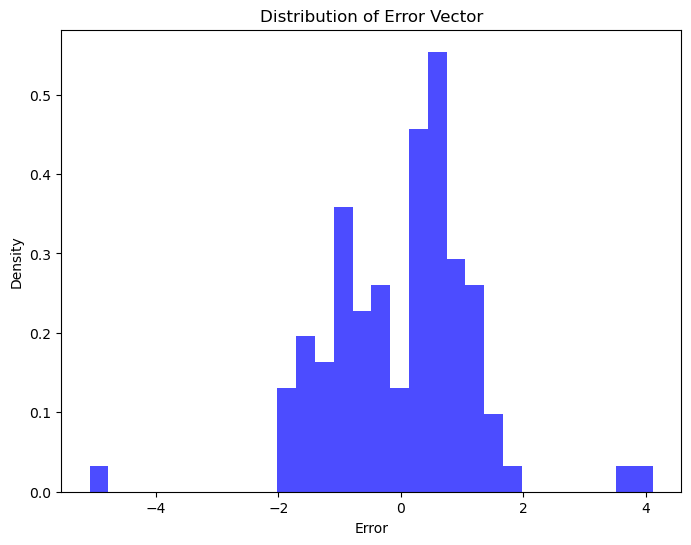

In [240]:
# View the distribution of error vectors and plot histograms
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, density=True, alpha=0.7, color='blue')
plt.title('Distribution of Error Vector')
plt.xlabel('Error')
plt.ylabel('Density')
plt.show()

In [241]:
kurt = kurtosis(residuals)
skewness = skew(residuals)

print(f'Kurtosis (Excess): {kurt}')
print(f'Skewness: {skewness}')

Kurtosis (Excess): 3.1931010009568785
Skewness: -0.26726658552879606


Fit the data using MLE given the assumption of normality. Then fit the MLE using the assumption of a T distribution of the errors. Which is the best fit?

In [242]:
def l_function_normal(params, X, y):
    b0, b1, e = params
    y_pred = b0 + X * b1
    residuals = y - y_pred
    likelihood = np.sum(norm.logpdf(residuals, loc = 0, scale = e))
    return -likelihood

In [243]:
def l_function_t(para, X, y):
    b0, b1, e, df = para
    y_pred = b0 + b1 * X
    residuals = y - y_pred
    likelihood = np.sum(t.logpdf(residuals, df, loc = 0, scale = df))
    return -likelihood

In [244]:
initial_guess_normal = [0, 0, 1]
result_normal= minimize(l_function_normal, initial_guess_normal, args=(X[:,1], y))

In [245]:
initial_guess_t = [0, 0, 1, 1]  # Initial guess for beta0, beta1, sigma, and degrees of freedom (df)
result_t = minimize(l_function_t, initial_guess_t, args=(X[:,1], y))

In [246]:
# Calculate AIC and BIC for each modelke
n = len(y)
k_normal = 3  # Number of parameters in the normal distribution model
k_t = 4      # Number of parameters in the t-distribution model

In [247]:
aic_normal = -2 * result_normal.fun + 2 * k_normal
bic_normal = -2 * result_normal.fun + k_normal * np.log(n)
aic_t = -2 * result_t.fun + 2 * k_t
bic_t = -2 * result_t.fun + k_t * np.log(n)

In [248]:
# Output the results
print("MLE Results (Normal Distribution):")
print("b0:", result_normal.x[0])
print("b1:", result_normal.x[1])
print("error:", result_normal.x[2])
print("AIC:", aic_normal)
print("BIC:", bic_normal)

MLE Results (Normal Distribution):
b0: 0.11983620833636628
b1: 0.6052048090554638
error: 1.1983941257586068
AIC: -313.98419337832456
BIC: -306.1686828203603


In [249]:
print("MLE Results (t-Distribution):")
print("b0:", result_t.x[0])
print("b1:", result_t.x[1])
print("error:", result_t.x[2])
print("df:", result_t.x[3])
print("AIC:", aic_t)
print("BIC:", bic_t)

MLE Results (t-Distribution):
b0: 0.23430842746282665
b1: 0.5656446626396994
error: 1.0
df: 1.0354843259541995
AIC: -343.66596447828823
BIC: -333.2452837343359


Compare models based on AIC and BIC

In [250]:
if aic_normal < aic_t and bic_normal < bic_t:
    print("\nThe Normal Distribution Model is the best fit.")
elif aic_t < aic_normal and bic_t < bic_normal:
    print("\nThe t-Distribution Model is the best fit.")
else:
    print("\nBoth models provide a similar fit.")


The t-Distribution Model is the best fit.


Problem 3

Simulate AR(1) through AR(3) and MA(1) through MA(3) processes. Compare their ACF and
PACF graphs. How do the graphs help us to identify the type and order of each process?

In [265]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

Simulate AR(1) processes

In [266]:
np.random.seed(0)
ar1 = sm.tsa.ArmaProcess(ar=[1, -0.5], ma=[1])
ar1_data = ar1.generate_sample(nsample=2000)

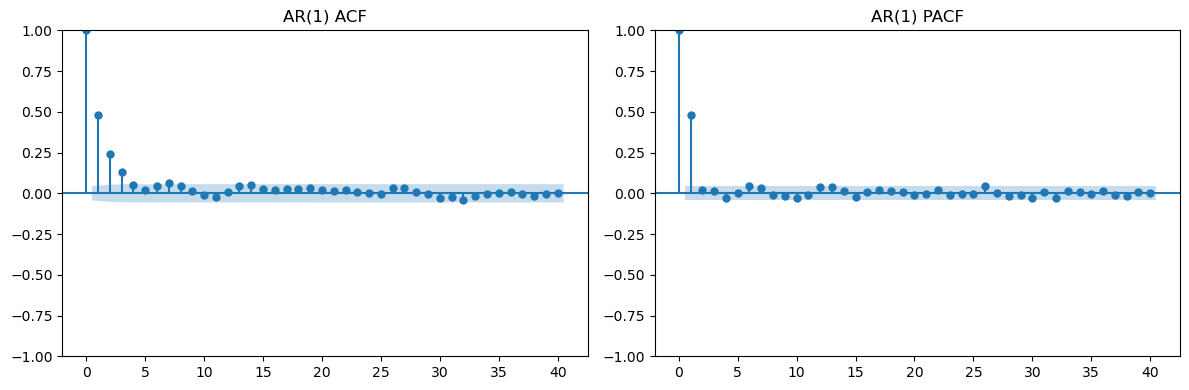

In [267]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
plot_acf(ar1_data, lags=40, ax=plt.gca(), title='AR(1) ACF')
plt.subplot(122)
plot_pacf(ar1_data, lags=40, ax=plt.gca(), title='AR(1) PACF')
plt.tight_layout()
plt.show()

In [268]:
ar2 = sm.tsa.ArmaProcess(ar=[1, -0.5, -0.25], ma=[1])
ar2_data = ar2.generate_sample(nsample=2000)

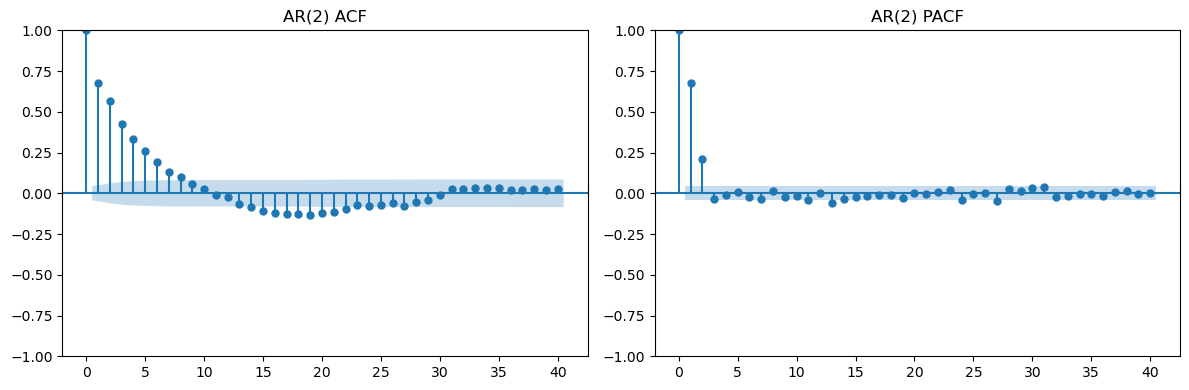

In [269]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
plot_acf(ar2_data, lags=40, ax=plt.gca(), title='AR(2) ACF')
plt.subplot(122)
plot_pacf(ar2_data, lags=40, ax=plt.gca(), title='AR(2) PACF')
plt.tight_layout()
plt.show()

In [270]:
ar3 = sm.tsa.ArmaProcess(ar=[1, -0.5, -0.25, -0.125], ma=[1])
ar3_data = ar3.generate_sample(nsample=2000)

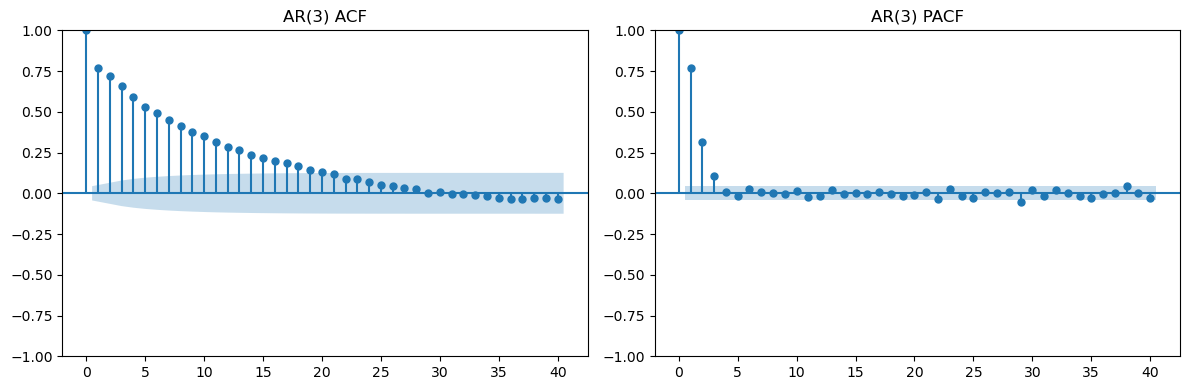

In [271]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
plot_acf(ar3_data, lags=40, ax=plt.gca(), title='AR(3) ACF')
plt.subplot(122)
plot_pacf(ar3_data, lags=40, ax=plt.gca(), title='AR(3) PACF')
plt.tight_layout()
plt.show()

In [272]:
ma1 = sm.tsa.ArmaProcess(ar=[1], ma=[1, -0.5])
ma1_data = ma1.generate_sample(nsample=2000)

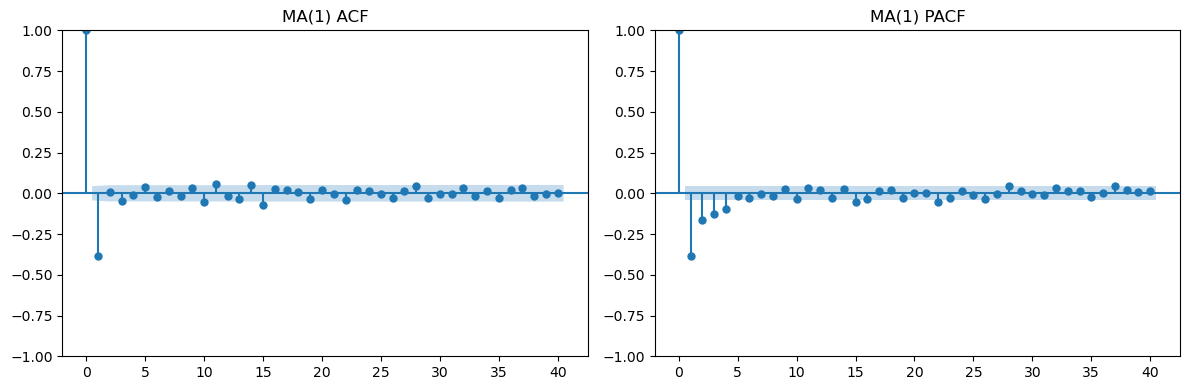

In [273]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
plot_acf(ma1_data, lags=40, ax=plt.gca(), title='MA(1) ACF')
plt.subplot(122)
plot_pacf(ma1_data, lags=40, ax=plt.gca(), title='MA(1) PACF')
plt.tight_layout()
plt.show()

In [274]:
ma2 = sm.tsa.ArmaProcess(ar=[1], ma=[1, -0.5, 0.4])
ma2_data = ma2.generate_sample(nsample=2000)

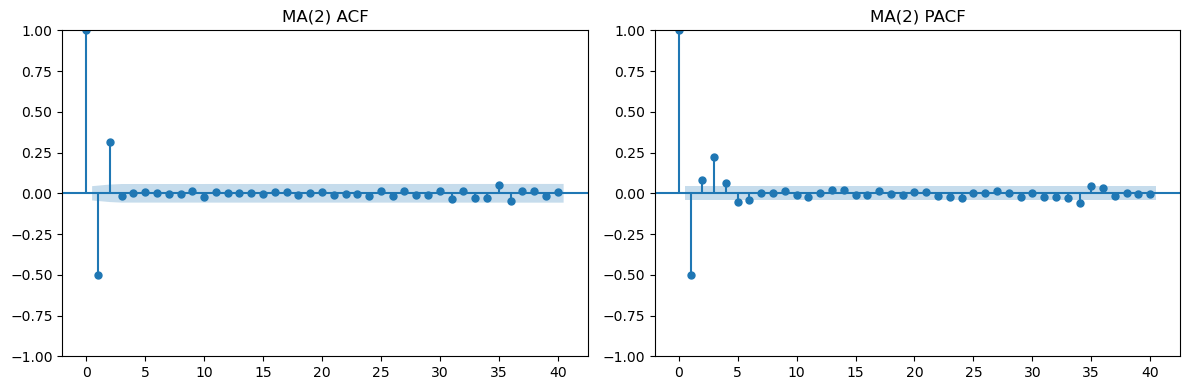

In [275]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
plot_acf(ma2_data, lags=40, ax=plt.gca(), title='MA(2) ACF')
plt.subplot(122)
plot_pacf(ma2_data, lags=40, ax=plt.gca(), title='MA(2) PACF')
plt.tight_layout()
plt.show()

In [276]:
ma3 = sm.tsa.ArmaProcess(ar=[1], ma=[1, -0.5, 0.3, 0.2])
ma3_data = ma3.generate_sample(nsample=2000)

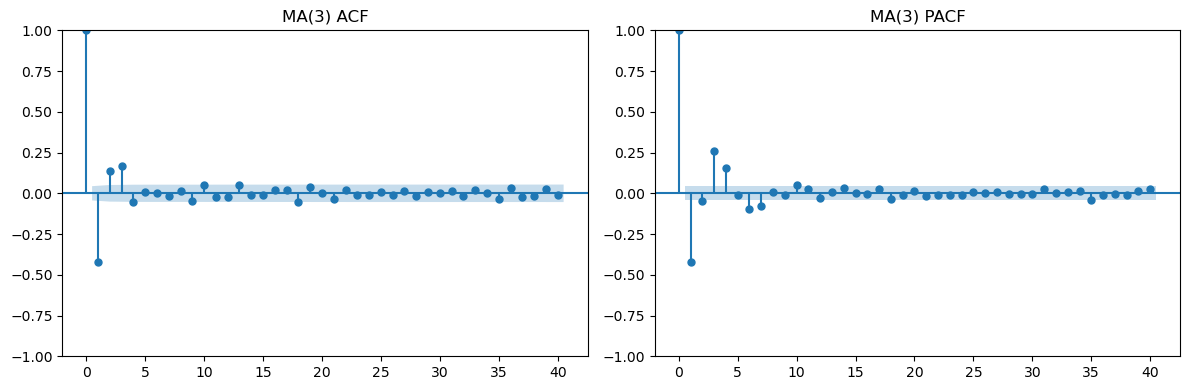

In [277]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
plot_acf(ma3_data, lags=40, ax=plt.gca(), title='MA(3) ACF')
plt.subplot(122)
plot_pacf(ma3_data, lags=40, ax=plt.gca(), title='MA(3) PACF')
plt.tight_layout()
plt.show()